In [1]:
import logging as log
import os
import os.path as path
import pickle
import subprocess
import sys
import time
from multiprocessing import Pool
from pathlib import Path
from matplotlib import pyplot as plt

import numpy as np
import pandas as pd

In [2]:
df = pd.read_pickle(path.join('..', 'data', 'feat_matrix.pkl'))
with open(path.join('..', 'data', 'features_x.txt'), 'rb') as f:
    features = pickle.load(f)

In [3]:
df.columns

Index(['Id', 'Week', 'Type', 'Store', 'DateInt', 'AvgYearCustomers',
       'SchoolHoliday', 'Avg3MonthsSales', 'AvgSales', 'DayOfYear',
       'StateHoliday', 'Month', 'LastDaySales', 'AvgPromo', 'AvgWeekSales',
       'LastDayCustomers', 'AvgSchoolHoliday', 'IsSaturday', 'Customers',
       'AvgYearSales', 'Avg3MonthsCustomers', 'Outlier',
       'AvgCustomersSchoolHoliday', 'AvgWeekCustomers', 'AvgCustomers',
       'SalesLog', 'Promo', 'Year', 'HolidayNextWeek', 'DayOfMonth',
       'HolidayLastWeek', 'DayOfWeek', 'IsSunday', 'AvgCustomersPromo',
       'Sales', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSince', 'Promo2Weeks', 'Promo2', 'PromoInterval',
       'MonthsSincePromo2'],
      dtype='object')

In [4]:
df[df['MonthsSincePromo2'] == 0].shape[0]

556115

In [5]:
df[df['Outlier']].groupby(['Store'])['Sales'].count().sort_values(ascending=False).head(10)

Store
103     305
708     249
349     236
972     234
674     191
560     189
25      186
837     185
1081    185
105     182
Name: Sales, dtype: int64

In [6]:
df[df['Type'] == 'dropout'][['Outlier', 'Sales', 'SalesLog']].head()

,Outlier,Sales,SalesLog
51472,True,0.0,0.0
52405,True,0.0,0.0
52406,True,0.0,0.0
52407,True,0.0,0.0
52408,True,0.0,0.0


In [7]:
df['Date'] = pd.to_datetime(df['DateInt'].apply(str))
df = df.set_index('Date')

In [8]:
train = pd.read_csv('../data/train.csv', low_memory=False)
train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index('Date').sort_index()
train[train['Sales'] == 0].shape

(172871, 8)

In [9]:
df[df['Month'] == 11]['Sales'].mean()

6008.111821138212

In [10]:
df[df['Month'] == 12]['Sales'].mean()

6826.611376868607

In [11]:
df[df['Month'] == 10]['Sales'].mean()

5537.037419354839

In [12]:
df[(df['Sales'] == 0) & (df['Type'] == 'train')]

,Id,Week,Type,Store,DateInt,AvgYearCustomers,SchoolHoliday,Avg3MonthsSales,AvgSales,DayOfYear,...,AvgCustomersPromo,Sales,StoreType,Assortment,CompetitionDistance,CompetitionOpenSince,Promo2Weeks,Promo2,PromoInterval,MonthsSincePromo2
Date,,,,,,,,,,,,,,,,,,,,,


In [13]:
train[(train['Open'] == 1) & (train['Sales'] == 0)].shape[0]

54

In [14]:
train[train['Sales'] > 0]['Sales'].median()

6369.0

In [15]:
train[(train['Sales'] == 0) & (train.index < '2015-06-15')].count()

Store            166318
DayOfWeek        166318
Sales            166318
Customers        166318
Open             166318
Promo            166318
StateHoliday     166318
SchoolHoliday    166318
dtype: int64

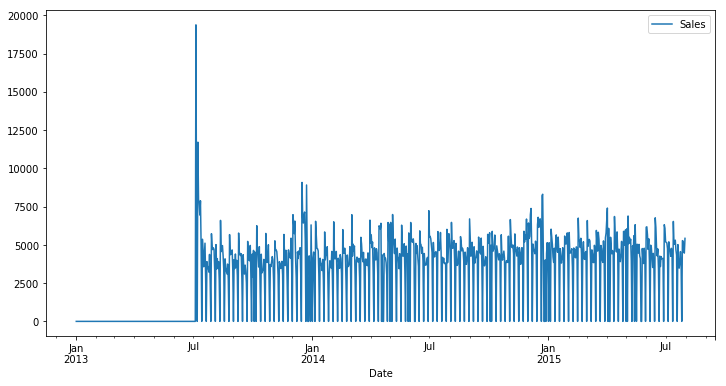

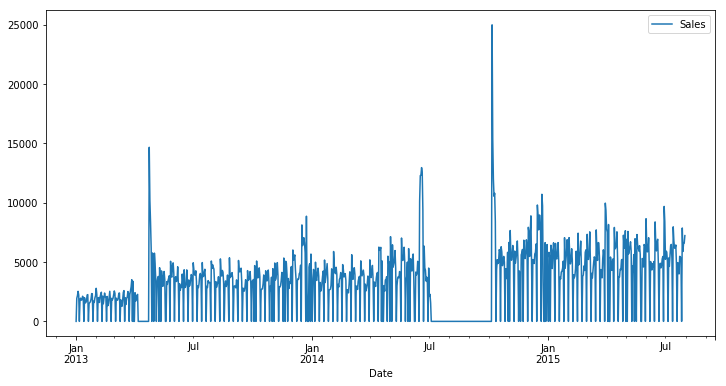

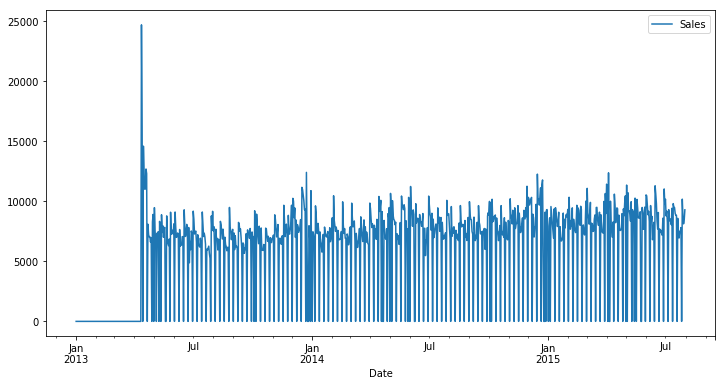

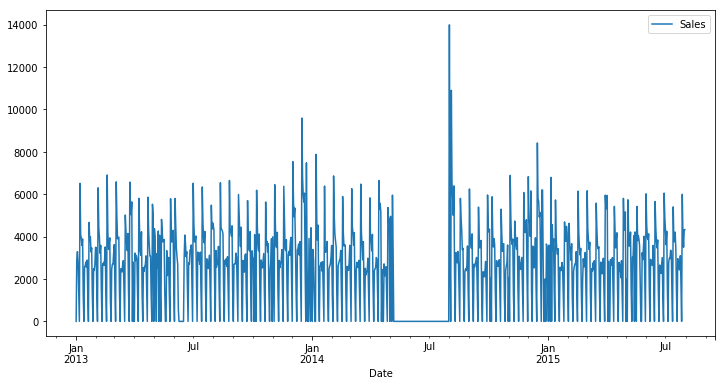

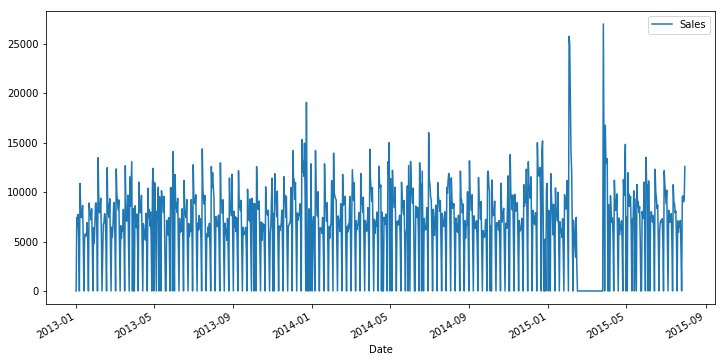

In [16]:
store_103 = train[train['Store'] == 103]
store_103[['Sales']].plot(figsize=(12,6))
store_708 = train[train['Store'] == 708]
store_708[['Sales']].plot(figsize=(12,6))
store_349 = train[train['Store'] == 349]
store_349[['Sales']].plot(figsize=(12,6))
store_972 = df[df['Store'] == 972]
store_972[['Sales']].plot(figsize=(12,6))
store_674 = df[df['Store'] == 674]
store_674[['Sales']].plot(figsize=(12,6))
plt.show()

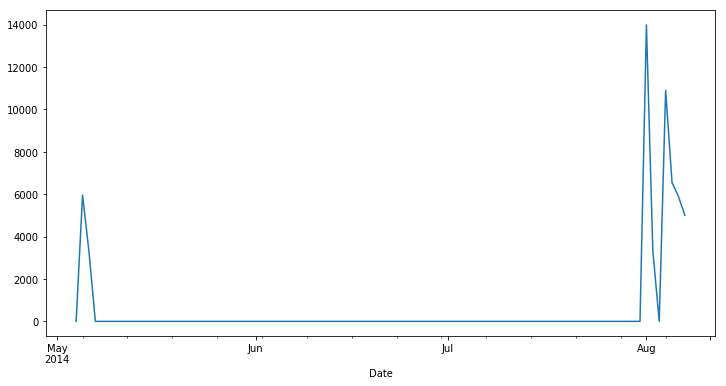

In [17]:
store_972[(store_972.index > '2014-05-03') & (store_972.index < '2014-08-08')]['Sales'].sort_index().plot(figsize=(12,6))

In [18]:
store = pd.read_csv('../data/store.csv', low_memory=False)

In [19]:
store[store['Store'] == 708]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
707,708,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"


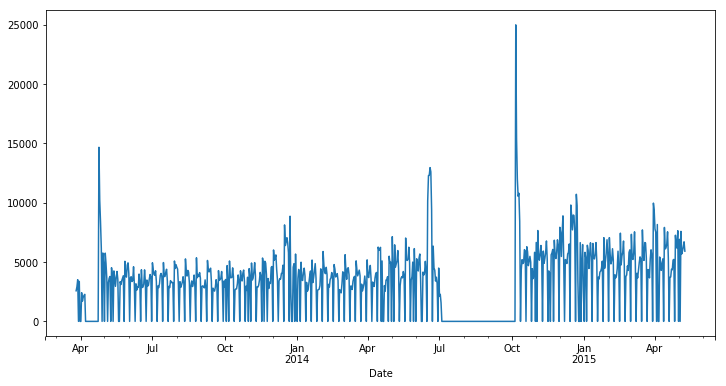

In [20]:
store_708[(store_708.index > '2013-03-25') & (store_708.index < '2015-05-10')]['Sales'].plot(figsize=(12,6))

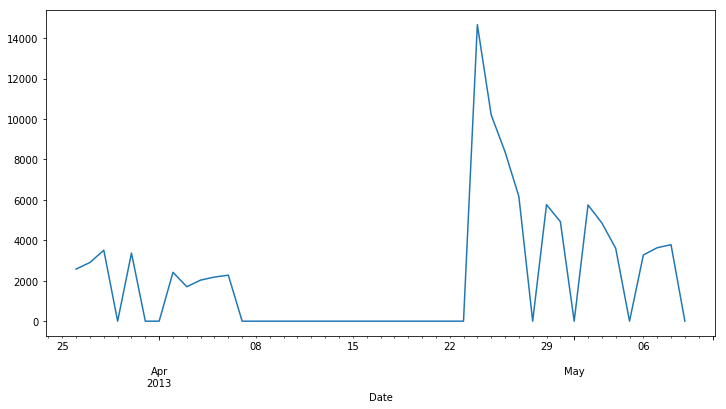

In [21]:
store_708[(store_708.index > '2013-03-25') & (store_708.index < '2013-05-10')]['Sales'].plot(figsize=(12,6))

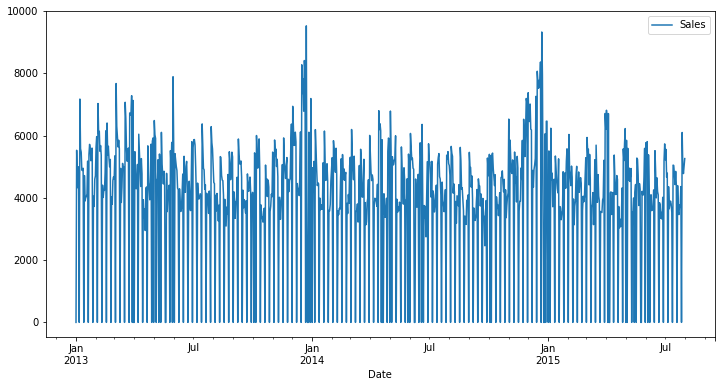

In [22]:
store_1 = train[train['Store'] == 1]
store_1[['Sales']].plot(figsize=(12,6))

In [23]:
store[store['Store'] == 1]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


In [24]:
store['PromoInterval'].unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [25]:
outliers = pd.read_csv('../data/outliers.csv', low_memory=False, usecols=[1,2,3])

In [26]:
outliers['Count'].sum()

595

In [27]:
outliers['Column'].unique()

array(['SalesLog', 'IsSunday'], dtype=object)

In [28]:
outliers[outliers['Column'] == 'SalesLog']

,Store,Column,Count
0,11,SalesLog,2
1,25,SalesLog,4
2,30,SalesLog,2
3,33,SalesLog,2
4,34,SalesLog,1
5,40,SalesLog,7
6,43,SalesLog,1
7,45,SalesLog,1
8,49,SalesLog,3
9,50,SalesLog,1
